# Welcome to the Fake News Analizer!

## First steps

 Here we import all the libraries needed for the project and import the data from the CSV. All the data is in one csv named "fake.csv". This csv has got several rows and columns that will be evaluated in this notebook.

In [28]:
import pandas as pd
pd.options.display.max_rows = 500
import sklearn as skl
import nltk
import numpy as np
import matplotlib.pyplot as plt


In [29]:
fake = pd.read_csv("fake_clean.csv", na_values=[""])
print(fake.head(n=5))

Unnamed: 0  ord_in_thread                author  \
0           0              0     Barracuda Brigade   
1           1              0  reasoning with facts   
2           2              0     Barracuda Brigade   
3           3              0                Fed Up   
4           4              0                Fed Up   

                       published  \
0  2016-10-26T21:41:00.000+03:00   
1  2016-10-29T08:47:11.259+03:00   
2  2016-10-31T01:41:49.479+02:00   
3  2016-11-01T05:22:00.000+02:00   
4  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  engli

As we can see it is a pretty big dataset. Let's talk numbers!

In [30]:
print("Number of rows: ", len(fake.index))

print("Number of columns: ", len(fake.columns))

Number of rows:  12650
Number of columns:  19


There are 12999 rows and 20 different columns. This constitutes a big sample of fake news to analyse. Let's now see which type of data we have.

In [31]:
print(fake.dtypes)


Unnamed: 0              int64
ord_in_thread           int64
author                 object
published              object
title                  object
text                   object
language               object
crawled                object
site_url               object
country                object
domain_rank             int64
thread_title           object
spam_score            float64
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                   object
dtype: object


## Data Analysis

Now we will do some statistic research on the data, so we can understand it better

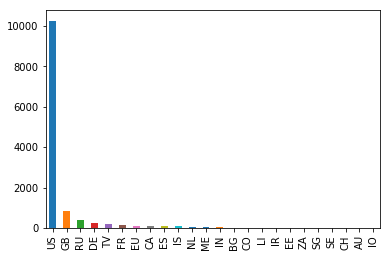

In [32]:
fake['country'].value_counts().plot(kind='bar')
plt.savefig('countryGraph.png')

As we can see from the graph, the dataset contains news from several different countries, althought the big majority comes from the US.

In [33]:
fake['site_url'].value_counts()

anonhq.com                        100
fellowshipoftheminds.com          100
abovetopsecret.com                100
humansarefree.com                 100
disclose.tv                       100
presstv.ir                        100
waterfordwhispersnews.com         100
trueactivist.com                  100
truthfeed.com                     100
wnd.com                           100
occupydemocrats.com               100
blacklistednews.com               100
unz.com                           100
dailystormer.com                  100
investmentwatchblog.com           100
amren.com                         100
ihavethetruth.com                 100
voltairenet.org                   100
rt.com                            100
rinf.com                          100
barenakedislam.com                100
thedailysheeple.com               100
ijr.com                           100
thepoke.co.uk                     100
freedomoutpost.com                100
davidstockmanscontracorner.com    100
govtslaves.i

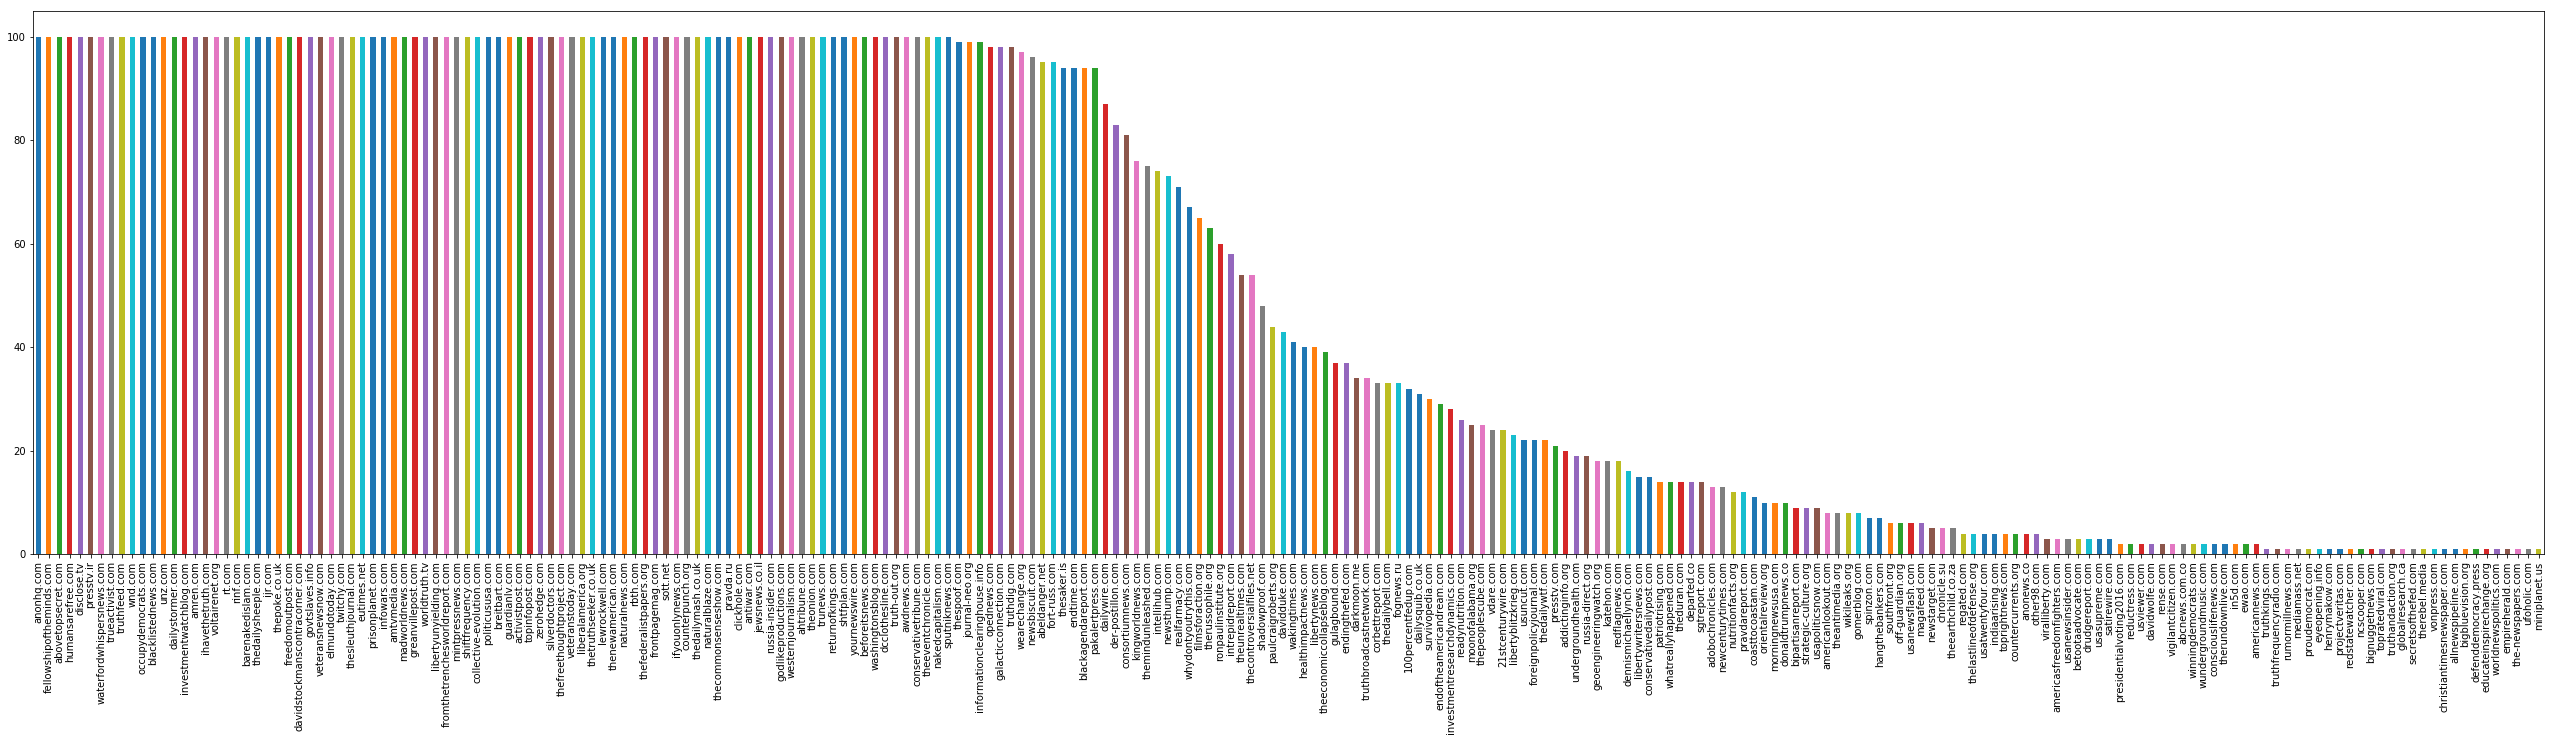

In [34]:
fake['site_url'].value_counts().plot(kind='bar',figsize=(45,10))
plt.savefig('siteGraph.png')

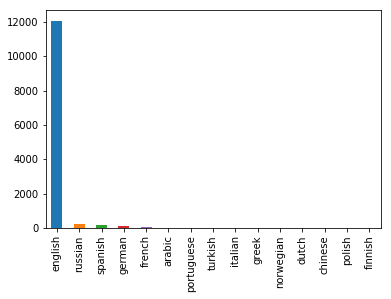

In [35]:
fake['language'].value_counts().plot(kind='bar', figsize=(6,4));
plt.savefig('languageGraph.png')

As we can see, almost all articles are written in english, but there are 16 languages present in total.

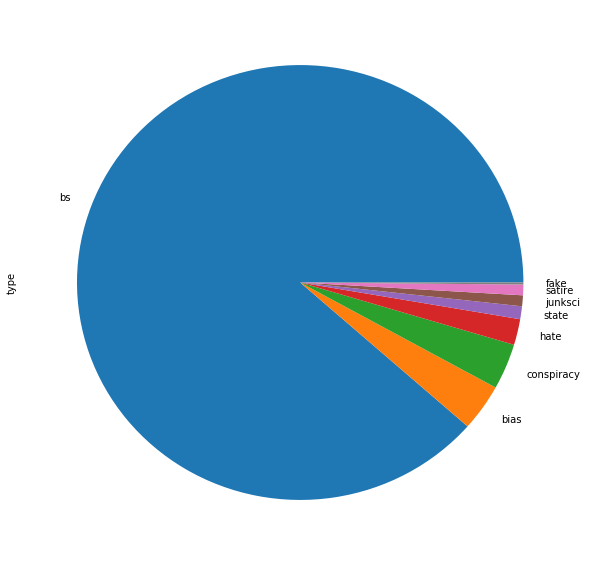

In [36]:
fake['type'].value_counts().plot(kind='pie',figsize=(10,10))
plt.savefig('typeGraph.png')

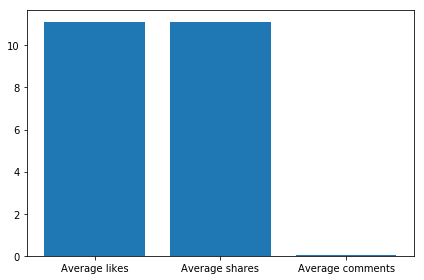

In [37]:
avg_likes = fake['likes'].mean()
avg_shares = fake['shares'].mean()
avg_comments = fake['comments'].mean()
plt.bar(['Average likes', 'Average shares', 'Average comments'], [avg_likes, avg_shares, avg_comments])
plt.tight_layout()
plt.savefig('statsGraph.png')


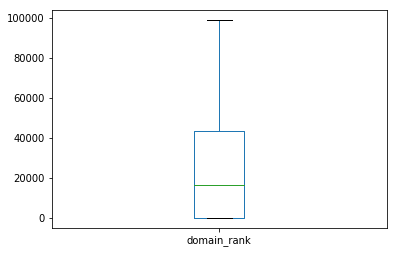

In [38]:
fake['domain_rank'].plot.box()
plt.savefig('domainrankGraph.png')

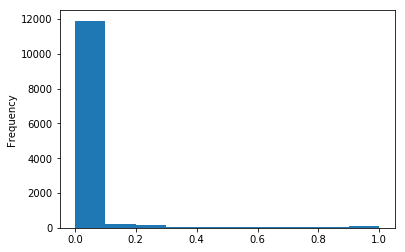

In [39]:
fake['spam_score'].plot.hist()

In [40]:
print(fake['spam_score'].value_counts())

0.000    11290
0.001       77
0.002       39
0.007       31
0.003       29
0.200       24
0.009       19
0.006       19
0.004       16
0.322       15
1.000       15
0.022       14
0.005       14
0.011       13
0.015       11
0.008       10
0.032       10
0.010       10
0.025       10
0.012       10
0.094        9
0.033        9
0.028        8
0.509        8
0.020        8
0.050        8
0.034        8
0.029        8
0.174        7
0.019        7
0.190        7
0.014        7
0.017        7
0.021        7
0.040        7
0.966        7
0.018        6
0.634        6
0.031        6
0.156        6
0.024        6
0.035        6
0.122        6
0.016        6
0.045        5
0.030        5
0.076        5
0.023        5
0.097        5
0.027        5
0.146        5
0.205        5
0.192        5
0.184        5
0.038        5
0.133        5
0.051        5
0.223        5
0.148        5
0.026        5
0.043        5
0.608        5
0.194        5
0.048        5
0.044        4
0.199        4
0.384     

In [ ]:
line=''